In [1]:
%load_ext autoreload 
%autoreload 2 

from OneDMotorPlant import OneDimReach
from agents.agent import Agent 
from collections import deque 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
env = OneDimReach(start_pos=1.)
env_info = env.reset()


In [3]:
#Provide some information about the initial state and target position

action_size = env.action_size
print('Size of each action:',action_size)

#Examine the state space 
state = env.state
state_size = len(state)
print('The agent observes a state with length: {}'.format(state_size))
print('The starting state looks like:',state)


Size of each action: 1
The agent observes a state with length: 3
The starting state looks like: [0.5 0.  0. ]


In [4]:
#Instantiate the agent : 
agent = Agent(state_size,action_size,random_seed=2)

In [5]:
n_games=100
score_history = []
best_score = 0
for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    agent.noise.reset()
    while not done:
        action = agent.act(env.state)
        observation_,reward,done,info = env.step(action)
        agent.step(observation,action,reward,observation_,done)
        score += env.reward
        observation = observation_
    
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])
    
    if avg_score > best_score:
        best_score = avg_score
        
        
    print('episode',i,'score %.1f' % score, 'average score %.1f' % avg_score)
        
    x = [i+1 for i in range(n_games)]

episode 0 score -0.2 average score -0.2
episode 1 score -0.2 average score -0.2
episode 2 score -0.2 average score -0.2
episode 3 score -0.2 average score -0.2
episode 4 score -0.1 average score -0.2
episode 5 score -0.1 average score -0.2
episode 6 score -0.1 average score -0.2
episode 7 score -0.1 average score -0.2
episode 8 score -0.1 average score -0.1
episode 9 score -0.1 average score -0.1
episode 10 score -0.0 average score -0.1
episode 11 score -0.0 average score -0.1
episode 12 score -0.0 average score -0.1
episode 13 score -0.0 average score -0.1
episode 14 score -0.1 average score -0.1
episode 15 score -0.0 average score -0.1
episode 16 score -0.0 average score -0.1
episode 17 score -0.0 average score -0.1
episode 18 score -0.0 average score -0.1
episode 19 score -0.0 average score -0.1
episode 20 score -0.0 average score -0.1
episode 21 score -0.0 average score -0.1
episode 22 score -0.0 average score -0.1
episode 23 score -0.0 average score -0.1
episode 24 score -0.0 aver

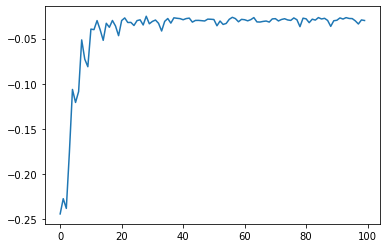

In [6]:
plt.plot(score_history)

In [9]:
print(env.state)
print(env.time)
print(agent.act(env.state))

[0.5 0.  0. ]
0
[-0.83000904]


In [8]:
_=env.reset()
print(env.time)
print(env.state)

0
[0.5 0.  0. ]
